# Seaborn Basics


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

The goal of this exercise is to analyze a restaurant invoices and tips

In [2]:
df = sns.load_dataset('tips')

df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:

df.info

<bound method DataFrame.info of      total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]>

## 1. Counting number of datapoints
---

❓ **On which day of the week are there more reservations at the restaurant?**
- Show this with a Seaborn "Countplot"
- Arrange days in week order (try using the `order` keyword argument)
- Don't use rainbow colors

Text(0, 0.5, 'Number of reservations')

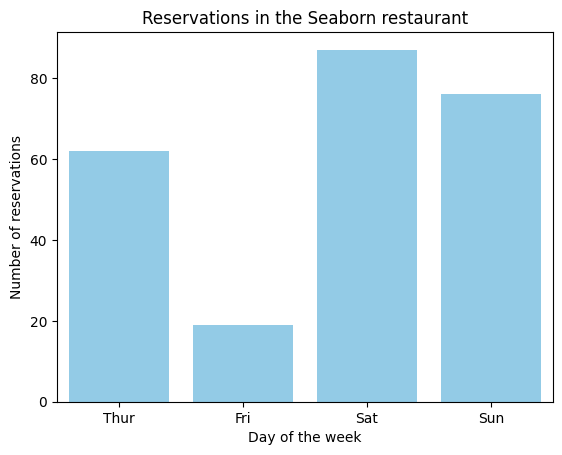

In [59]:
days_order = ['Thur','Fri','Sat','Sun',]
color = "#89CFF0"
plt.title('Reservations in the Seaborn restaurant')
hue_colors = {'Yes': 'orange', 'No': 'blue'}
sns.countplot(x=df['day'],order=days_order,color=color,saturation=0.8)
plt.xlabel('Day of the week')
plt.ylabel('Number of reservations')

❓ Add a second breakdown with (`sex`, `smoker` or `time`) on top of the `day` dimension in a visually meaningful manner

Text(0, 0.5, 'Number of reservations')

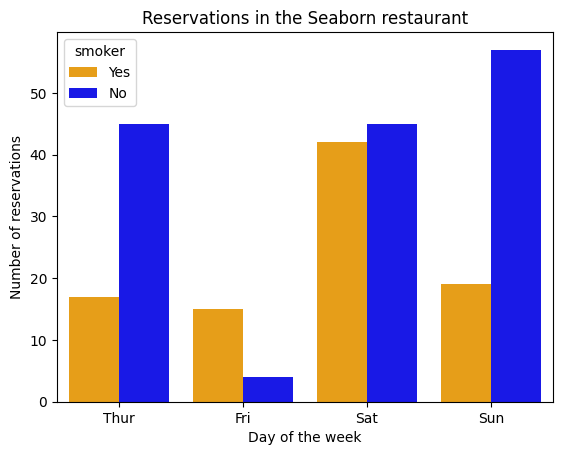

In [61]:
days_order = ['Thur','Fri','Sat','Sun',]
color = "#89CFF0"
plt.title('Reservations in the Seaborn restaurant')
hue_colors = {'Yes': 'orange', 'No': 'blue'}
sns.countplot(x=df['day'],hue=df['smoker'],order=days_order,color=color,saturation=0.8,palette=hue_colors)
plt.xlabel('Day of the week')
plt.ylabel('Number of reservations')

## 2. Plotting distributions of numeric values

Let's now analyse the `tips` values.

### 2.1 Simple distribution

❓ Plot a histogram with seaborn and try out different number of `bins`. Try to overlay the powerful kernel density estimator `kde` on top of the histogram

<AxesSubplot:xlabel='tip', ylabel='Count'>

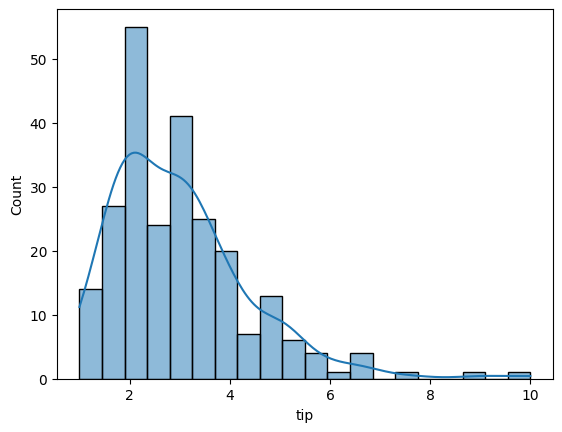

In [73]:
sns.histplot(data=df['tip'],bins=20,kde=True)

### 2.1 Multiples distribution, same ax

❓ Try to reproduce the graph below, and make sure to understand the different `kinds` of catplots (`"bar"`, `"box"`, `"violin"`, `"boxen"`)

<img src="https://wagon-public-datasets.s3.amazonaws.com/02-Data-Toolkit/03-Data-Visualization/boxplot_example.png" width=350>

In [80]:
sns.catplot(x='day',y='tip',data=d)

NameError: name 'd' is not defined

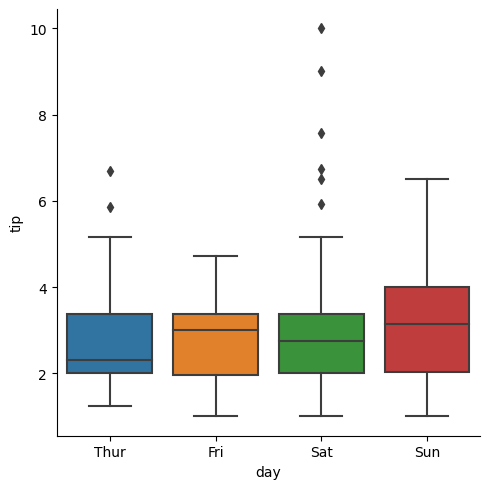

In [81]:
sns.catplot(x='day',y='tip',data=df,kind='box')

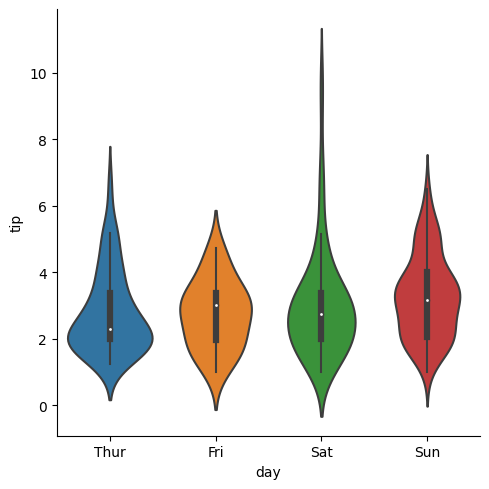

In [82]:
sns.catplot(x='day',y='tip',data=df,kind='violin')

### 2.2 FacetGrid of distributions

❓ Let's look into the powerful [`seaborn.FacetGrid`](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html)

1. Run the cell below. What do you observe?
2. Change `plt.hist` inside `g.map` to another plotting function (like `sns.histplot` with `kde=True`, or even a bi-variate function like `sns.scatterplot`). Make sure to understand how this works!

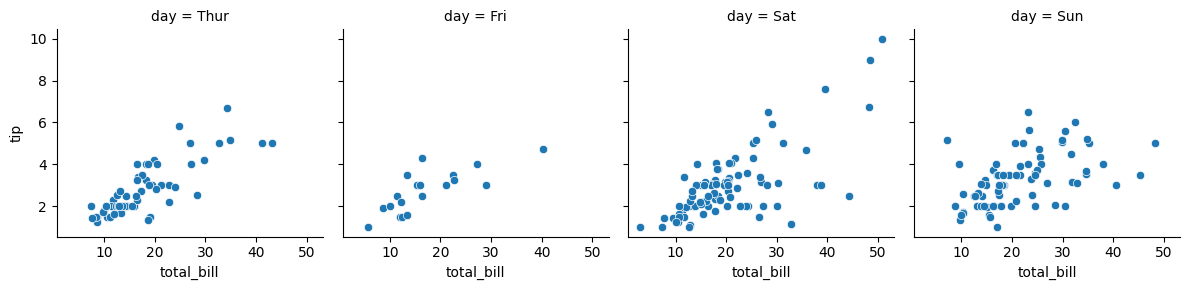

In [88]:
g = sns.FacetGrid(df, col="day")
g.map(sns.scatterplot, 'total_bill', 'tip')

❓ Let's add a `row="smoker"` and `hue="smoker"` parameter. 

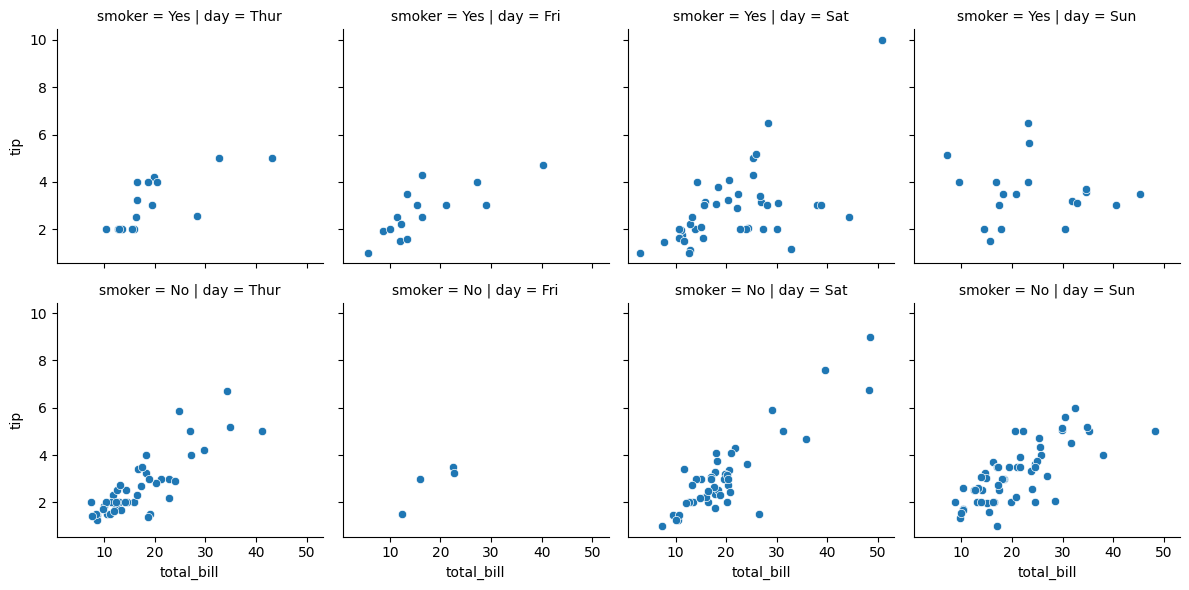

In [89]:
g = sns.FacetGrid(df, col="day",row='smoker')
g.map(sns.scatterplot, 'total_bill', 'tip')

## Correlations

Let's start looking for correlation between  `tip` and `total_bill`


❓ First, *regress `tip`on `total_bill`* (scatterplot of `tips` on y-axis versus `total_bill` on x)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

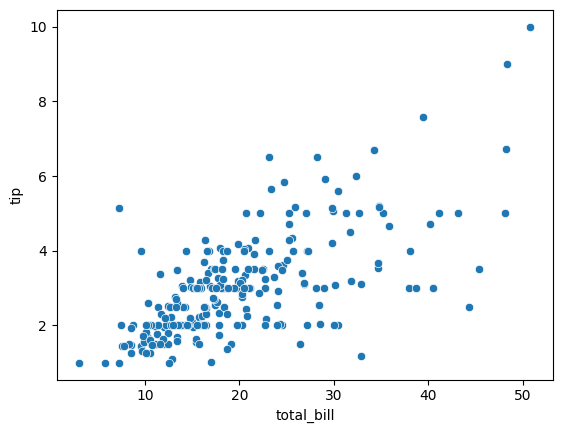

In [94]:
sns.scatterplot(x="total_bill",y="tip",data=df)

❓ Another beautiful way of looking at this data is to use the [`seaborn.jointplot`](https://seaborn.pydata.org/generated/seaborn.jointplot.html)

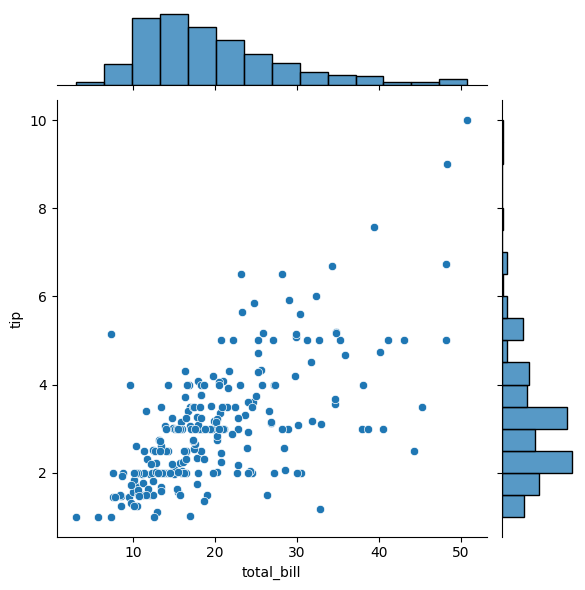

In [95]:
#Join Plot
sns.jointplot(x='total_bill',y='tip',data=df)

❓ Let's now compute a simple linear regression curve using `sns.regplot()`

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

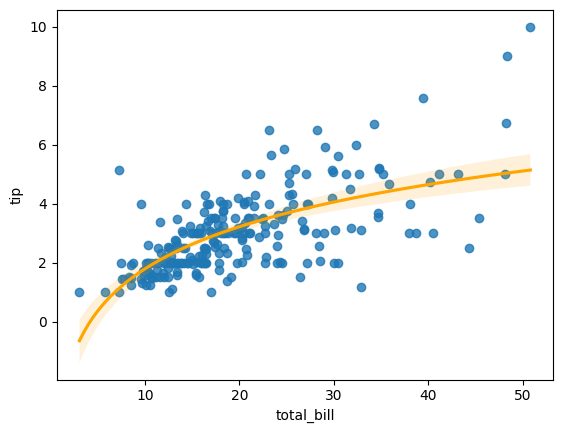

In [106]:
sns.regplot(x="total_bill",y="tip",data=df,logx=True,line_kws=dict(color='orange'))

❓Now, try also to use a `FacetGrid` to plot two regplots (one for smokers only, one for non-smokers). What conclusion can you draw?

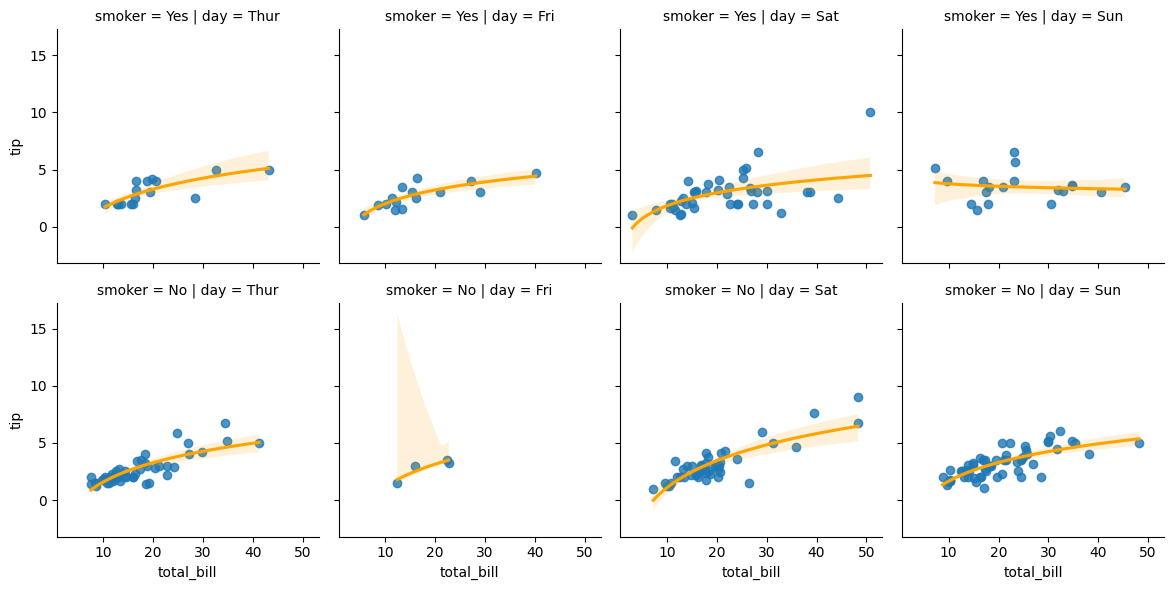

In [115]:
g = sns.FacetGrid(col='day',row='smoker',data=df)
g.map(sns.regplot, "total_bill","tip",data=df,logx=True,line_kws=dict(color='orange'))

## DataFrame-wide analysis with pairplot

❓ A very useful tool to identify **all correlations between all pairs of dataframe's columns** is the [`seaborn.pairplot`](https://seaborn.pydata.org/generated/seaborn.pairplot.html):

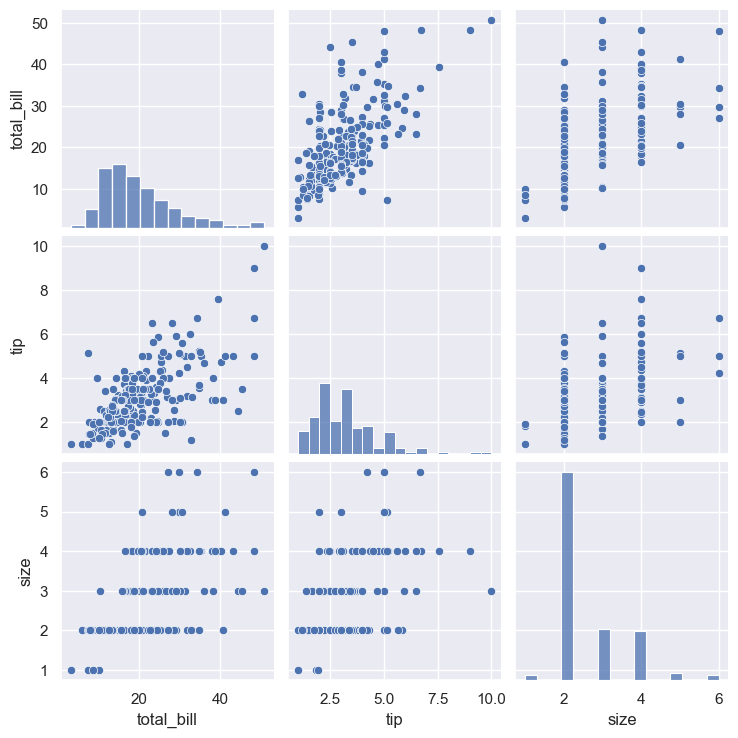

In [123]:
sns.set(style='darkgrid')
sns.pairplot(df)